# Import Libraries

In [54]:
import numpy as np 
import pandas as pd 

import seaborn as sns 
import matplotlib.pyplot as plt 
import sqlite3
import pandasql as ps #sql package
import wordcloud #use for the word cloud plot
from wordcloud import WordCloud, STOPWORDS #optional to filter out the stopwords




# Loading the dataset

In [4]:
df = pd.read_csv("reddit_data.csv ")

<ipython-input-4-ee79398122c9>:1: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("reddit_data.csv ")


In [57]:
df

,id,title,score,author,author_flair_text,removed_by,total_awards_received,awarders,created_utc,full_link,num_comments,over_18
0,hbyv2e,[OC] How Bar Chart Race Animation Can be Creat...,1,Tom10AE,NaN,NaN,0.0,[],1592565317,https://www.reddit.com/r/dataisbeautiful/comme...,0,False
1,hbynoy,[UK] Labour and Conservative vote share by age...,1,Ge0rgeBr0ughton,NaN,NaN,0.0,[],1592564316,https://www.reddit.com/r/dataisbeautiful/comme...,1,False
2,hbym2y,[NOC] Number of wallets returned across the wo...,1,i_am_shattered,NaN,NaN,0.0,[],1592564089,https://www.reddit.com/r/dataisbeautiful/comme...,1,False
3,hbyirw,Largest Banana Producing Countries (1961-2020)...,1,Bilal078692,NaN,moderator,0.0,[],1592563628,https://www.reddit.com/r/dataisbeautiful/comme...,0,False
4,hby1fy,[OC] Popular Combinations for the StamiStudios...,1,shahinrostami,Viz Researcher,NaN,0.0,[],1592561119,https://www.reddit.com/r/dataisbeautiful/comme...,2,False
...,...,...,...,...,...,...,...,...,...,...,...,...
183886,pqbdl,Infosthetics seems like it belongs here.,15,magiclamp,NaN,NaN,NaN,NaN,1329282849,https://www.reddit.com/r/dataisbeautiful/comme...,0,False
183887,pqav2,Time lapse of every nuclear detonation from 19...,9,th3sousa,NaN,NaN,NaN,NaN,1329282160,https://www.reddit.com/r/dataisbeautiful/comme...,0,False
183888,pq922,Wavii.,13,ddshroom,NaN,NaN,NaN,NaN,1329279777,https://www.reddit.com/r/dataisbeautiful/comme...,2,False
183889,ppx09,An interactive representation of Pres. Obamas ...,21,zanycaswell,NaN,NaN,NaN,NaN,1329265203,https://www.reddit.com/r/dataisbeautiful/comme...,0,False


# Data Cleaning

In [58]:
df.head()

,id,title,score,author,author_flair_text,removed_by,total_awards_received,awarders,created_utc,full_link,num_comments,over_18
0,hbyv2e,[OC] How Bar Chart Race Animation Can be Creat...,1,Tom10AE,NaN,NaN,0.0,[],1592565317,https://www.reddit.com/r/dataisbeautiful/comme...,0,False
1,hbynoy,[UK] Labour and Conservative vote share by age...,1,Ge0rgeBr0ughton,NaN,NaN,0.0,[],1592564316,https://www.reddit.com/r/dataisbeautiful/comme...,1,False
2,hbym2y,[NOC] Number of wallets returned across the wo...,1,i_am_shattered,NaN,NaN,0.0,[],1592564089,https://www.reddit.com/r/dataisbeautiful/comme...,1,False
3,hbyirw,Largest Banana Producing Countries (1961-2020)...,1,Bilal078692,NaN,moderator,0.0,[],1592563628,https://www.reddit.com/r/dataisbeautiful/comme...,0,False
4,hby1fy,[OC] Popular Combinations for the StamiStudios...,1,shahinrostami,Viz Researcher,NaN,0.0,[],1592561119,https://www.reddit.com/r/dataisbeautiful/comme...,2,False


In [56]:
df.tail()

,id,title,score,author,author_flair_text,removed_by,total_awards_received,awarders,created_utc,full_link,num_comments,over_18
183886,pqbdl,Infosthetics seems like it belongs here.,15,magiclamp,NaN,NaN,NaN,NaN,1329282849,https://www.reddit.com/r/dataisbeautiful/comme...,0,False
183887,pqav2,Time lapse of every nuclear detonation from 19...,9,th3sousa,NaN,NaN,NaN,NaN,1329282160,https://www.reddit.com/r/dataisbeautiful/comme...,0,False
183888,pq922,Wavii.,13,ddshroom,NaN,NaN,NaN,NaN,1329279777,https://www.reddit.com/r/dataisbeautiful/comme...,2,False
183889,ppx09,An interactive representation of Pres. Obamas ...,21,zanycaswell,NaN,NaN,NaN,NaN,1329265203,https://www.reddit.com/r/dataisbeautiful/comme...,0,False
183890,ppvl7,A map showing the geographical distribution of...,45,zanycaswell,NaN,NaN,NaN,NaN,1329263456,https://www.reddit.com/r/dataisbeautiful/comme...,5,False


In [7]:
print("Data shape :", df.shape)

Data shape : (183891, 12)


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183891 entries, 0 to 183890
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     183891 non-null  object 
 1   title                  183890 non-null  object 
 2   score                  183891 non-null  int64  
 3   author                 183891 non-null  object 
 4   author_flair_text      24574 non-null   object 
 5   removed_by             11564 non-null   object 
 6   total_awards_received  44007 non-null   float64
 7   awarders               33332 non-null   object 
 8   created_utc            183891 non-null  int64  
 9   full_link              183891 non-null  object 
 10  num_comments           183891 non-null  int64  
 11  over_18                183891 non-null  bool   
dtypes: bool(1), float64(1), int64(3), object(7)
memory usage: 15.6+ MB


In [9]:
df.describe()

,score,total_awards_received,created_utc,num_comments
count,183891.000000,44007.000000,1.838910e+05,183891.000000
mean,186.652131,0.003636,1.497016e+09,25.382248
std,1969.835481,0.129975,6.372761e+07,195.622576
min,0.000000,0.000000,1.329263e+09,0.000000
25%,1.000000,0.000000,1.447768e+09,1.000000
50%,1.000000,0.000000,1.496235e+09,1.000000
75%,5.000000,0.000000,1.554152e+09,4.000000
max,116226.000000,12.000000,1.592565e+09,18801.000000


In [10]:
df.isnull().sum()

id                            0
title                         1
score                         0
author                        0
author_flair_text        159317
removed_by               172327
total_awards_received    139884
awarders                 150559
created_utc                   0
full_link                     0
num_comments                  0
over_18                       0
dtype: int64

# Removed reddit data

# Checking who and why removed the reddit posts

In [27]:
r1 = """SELECT removed_by, count(distinct id)as number_of_removed
FROM df 
where removed_by is not null 
group by removed_by 
order by 2 desc """
grouped_df = ps.sqldf(r1, locals())
grouped_df


,removed_by,number_of_removed
0,moderator,8030
1,deleted,1714
2,automod_filtered,960
3,reddit,859
4,author,1


# Visualizing data by using bar plot

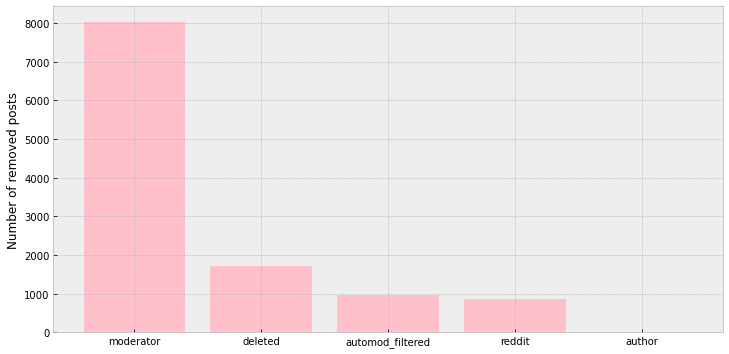

In [35]:
removed_by = grouped_df['removed_by'].tolist()
number_of_removed =  grouped_df['number_of_removed'].tolist()
plt.figure(figsize=(12,6))
plt.ylabel("Number of removed posts")
plt.bar(removed_by,number_of_removed, color = "pink")
plt.show()

# The majority of deleted posts 75% were moderator-removed. Authors remove fewer than 1% of their work.

# Who are the top three users whose posts were most frequently deleted by moderators?

In [36]:
r2 = """SELECT author, count(id) as number_of_removed
FROM df 
where removed_by = 'moderator' 
group by author 
order by 2 desc 
limit 5"""
print(ps.sqldf(r2, locals()))

         author  number_of_removed
0  hornedviper9                 71
1        kesu11                 15
2   ad55mul1994                 14
3   jamescdcruz                 13
4       hasmi99                 12


# Hornedviper is the user frequently deleted by moderators

# Let's find out how many posts containing the keyword "virus" the moderator has eliminated.

In [42]:
r3 = """
With Virus as (
SELECT id 
FROM df 
where removed_by = 'moderator' 
and title like '%virus%'
)

SELECT count(v.id) as virus_removed, count(d.id) as all_removed
FROM df d 
left join virus v on v.id = d.id 
where d.removed_by = 'moderator';"""

removed_moderator_df = ps.sqldf(r3, locals())
print(removed_moderator_df.values)


[[ 913 8030]]


# Checking % virus reddits from all removed posts:

In [43]:
virus_removed_id = removed_moderator_df.values[0][0]
all_removed_id = removed_moderator_df.values[0][1]


print(virus_removed_id/all_removed_id)

0.1136986301369863


# 11% of posts from Reddits that the moderator removed contain the keyword "virus."

# Most Popular reddits with most number of comments

In [45]:
#Top 10 reddits with the most number of comments:
q4 = """SELECT title, num_comments as number_of_comments 
FROM df  
where title != 'data_irl'
order by 2 desc 
limit 10"""
print(ps.sqldf(q4, locals()))

                                               title  number_of_comments
0            Police killing rates in G7 members [OC]               10425
1  Worst Episode Ever? The Most Commonly Rated Sh...                9179
2               What's getting cut in Trump's budget                8768
3  Almost all men are stronger than almost all wo...                7538
4  America’s new tobacco crisis: The rich stopped...                7418
5     [OC] 2020 Presidential Candidates by Net Worth                7323
6  Rolls of toilet paper used per person per year...                7303
7              Tinder over 3 years (18-21 Male) [OC]                7121
8  United States of Apathy: 2016 US Presidential ...                7073
9  I made a chart showing the popular vote turnou...                7058


# Here is a word cloud of the most used terms in Reddit titles:

In [46]:
#In order to create a wordcloud, we must eliminate NULL values:
df["title"] = df["title"].fillna(value="")

In [61]:
#Now let's add a string value instead to make our Series clean:
word_string=" ".join(df['title'].str.lower())


# Visualizing the worlcloud

(-0.5, 1599.5, 799.5, -0.5)

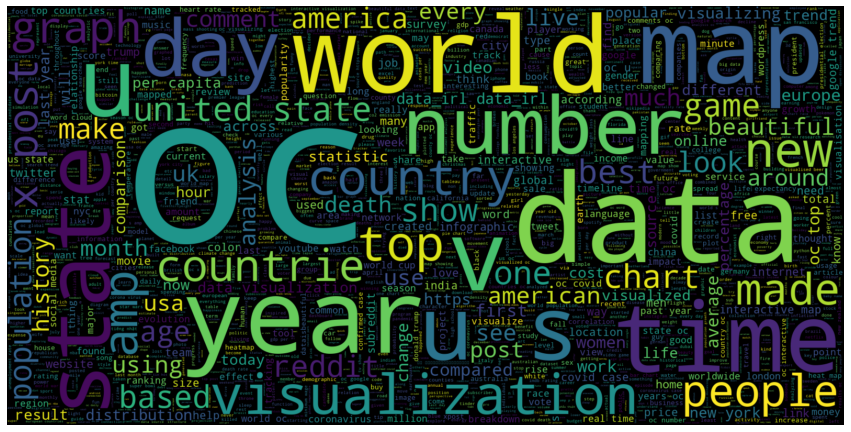

In [50]:
plt.figure(figsize=(15,15))
wc = WordCloud(background_color="black", stopwords = STOPWORDS, max_words=2000, max_font_size= 400,  width=1600, height=800)
wc.generate(word_string)

plt.imshow(wc.recolor( colormap= 'viridis' , random_state=17), interpolation="bilinear")
plt.axis('off')

# Correlation between dataset variables

# A value between -1 and +1 is used to express correlation, with +1 signifying the strongest positive correlation, -1 the highest negative correlation, and 0 signifying no correlation.

In [51]:
df.corr()

<ipython-input-51-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,score,total_awards_received,created_utc,num_comments,over_18
score,1.000000,0.327985,0.021763,0.628008,0.017975
total_awards_received,0.327985,1.000000,0.026082,0.207664,0.001987
created_utc,0.021763,0.026082,1.000000,0.022921,0.010344
num_comments,0.628008,0.207664,0.022921,1.000000,0.026616
over_18,0.017975,0.001987,0.010344,0.026616,1.000000


# A correlation value of 0.6 shows a strong positive correlation between the score and the number of comments. There is a minor positive connection of 0.2 between the number of comments and the overall number of awards obtained 0.1.

# Visualizing the correlation table using Heatmap

<ipython-input-53-d6c3a044135a>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  _ = sns.heatmap(df.corr(), annot=True, xticklabels=h_labels, yticklabels=h_labels, cmap=sns.cubehelix_palette(as_cmap=True), ax=ax)


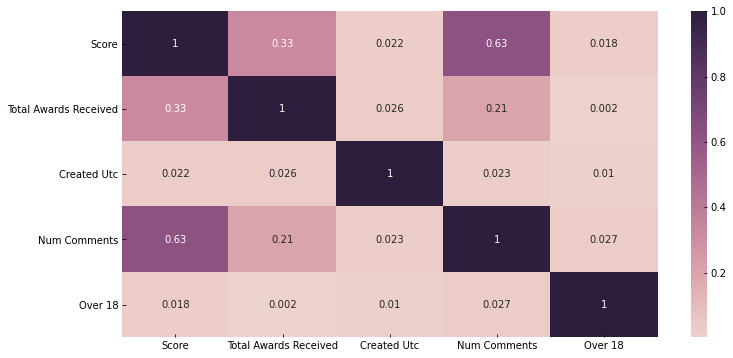

In [53]:
h_labels = [x.replace('_', ' ').title() for x in 
            list(df.select_dtypes(include=['number', 'bool']).columns.values)]

fig, ax = plt.subplots(figsize=(12,6))
_ = sns.heatmap(df.corr(), annot=True, xticklabels=h_labels, yticklabels=h_labels, cmap=sns.cubehelix_palette(as_cmap=True), ax=ax)